# Implementing a randomized block design

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
wealth_data = pd.read_csv('wealth_data_stratified.csv')
wealth_data.head()

,Strategy_Type,Annual_Return,high_annual_return,block,T_C
0,Quantitative,10.607983,1.0,1,treatment
1,Fundamental,17.022010,1.0,1,treatment
2,Quantitative,13.533875,1.0,1,treatment
3,Fundamental,10.676785,1.0,1,treatment
4,Quantitative,12.906762,1.0,1,treatment


#### Vamos a asignar 3 niveles de riesgo de inversión a cada bloque, pero previo a esto tenemos que barajear las filas dentro de cada bloque

In [21]:
df_wealth = wealth_data.groupby('block').apply(
    lambda x: x.sample(frac=1)
)

# reseteamos los indices porque se generaró un indice anidado
print(df_wealth.head(2),'\n')

df_wealth.reset_index(drop=True, inplace=True)

print(df_wealth.head(3))

         Strategy_Type  Annual_Return  high_annual_return  block        T_C
block                                                                      
1     97  Quantitative      17.241523                 1.0      1  treatment
      95  Quantitative      15.780308                 1.0      1  treatment 

  Strategy_Type  Annual_Return  high_annual_return  block        T_C
0  Quantitative      17.241523                 1.0      1  treatment
1  Quantitative      15.780308                 1.0      1  treatment
2  Quantitative      11.327406                 1.0      1  treatment


C:\Users\gerardo.urzua\AppData\Local\Temp\ipykernel_9852\4290423706.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_wealth = wealth_data.groupby('block').apply(


#### Asignamos de manera aleatoria los niveles de riesgo de inversión

In [22]:
df_wealth['risk'] = np.random.choice(
    ['low','medium','high'],
    size=len(df_wealth)
)
df_wealth.head(3)

,Strategy_Type,Annual_Return,high_annual_return,block,T_C,risk
0,Quantitative,17.241523,1.0,1,treatment,high
1,Quantitative,15.780308,1.0,1,treatment,medium
2,Quantitative,11.327406,1.0,1,treatment,medium


#### visualizamos los niveles de riesgo de cada bloque

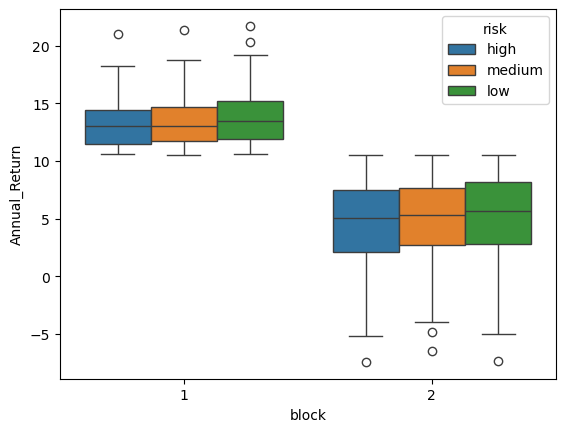

In [23]:
sns.boxplot(data=df_wealth, x='block', y='Annual_Return', hue='risk')
plt.show()

#### los quantiles de cada bloque son muy parecidos, vamos a realizar una prueba de Anova para evaluar si las medias entre los grupos de cada bloque tienen diferencias estadisticamente significativas

In [25]:
from scipy import stats

within_block_anova = df_wealth.groupby('block').apply(
    lambda x: stats.f_oneway(
        x[x['risk']=='low']['Annual_Return'],
        x[x['risk']=='medium']['Annual_Return'],
        x[x['risk']=='high']['Annual_Return']
    )
)

within_block_anova

C:\Users\gerardo.urzua\AppData\Local\Temp\ipykernel_9852\1071053335.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  within_block_anova = df_wealth.groupby('block').apply(


block
1    (1.2749748682453736, 0.2816230460135487)
2    (0.8661207112617575, 0.4210825116682073)
dtype: object

#### El test Anova one-way retorna dos valores, el primero es el estadistico y el segundo es el p-value, y en cuanto a la H0 nos dice que las medias no tienen diferencia estadistica, en el resultado de nuestra prueba podemos observar que ninguno de los p-value es menor 5% por lo cual podemos decir "Fail to reject the null hypothesis" las medias de los grupos dentro de los bloques no tienen diferencia estadisticamente significativa.